In [6]:
import vectorbt as vbt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [7]:
vstoxx_df = pd.read_csv("Data/VSTOXXhistorical.txt",
                 index_col=0, 
                 parse_dates=True, 
                 dayfirst=True)
 
vix_df = pd.read_csv("Data/VIXhistorical.csv",
                     index_col=0,
                     parse_dates=True)

vstoxx_df = vstoxx_df.iloc[:, 1:]
vstoxx_df = vstoxx_df.rename(columns={"Indexvalue": "Close"})
vstoxx_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6500 entries, 1999-01-04 to 2024-07-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   6500 non-null   float64
dtypes: float64(1)
memory usage: 101.6 KB


In [11]:
#concatenating data
cutoff_date = dt.datetime(1999, 1, 4)
df = pd.DataFrame(
    {"VSTOXX": vstoxx_df.loc[vstoxx_df.index >= cutoff_date, "Close"],
     "VIX": vix_df.loc[vix_df.index >= cutoff_date, "CLOSE"]} 
)
df.head()

,VSTOXX,VIX
1999-01-04,18.2033,26.17
1999-01-05,29.6912,24.46
1999-01-06,25.1670,23.34
1999-01-07,32.5205,24.37
1999-01-08,33.2296,23.28


In [12]:
df.describe()

,VSTOXX,VIX
count,6500.000000,6437.000000
mean,23.495357,20.086699
std,9.352124,8.414864
min,10.678300,9.140000
25%,16.998550,13.960000
50%,21.573800,18.260000
75%,27.119575,23.860000
max,87.512700,82.690000


Text(0, 0.5, 'VSTOXX/VIX')

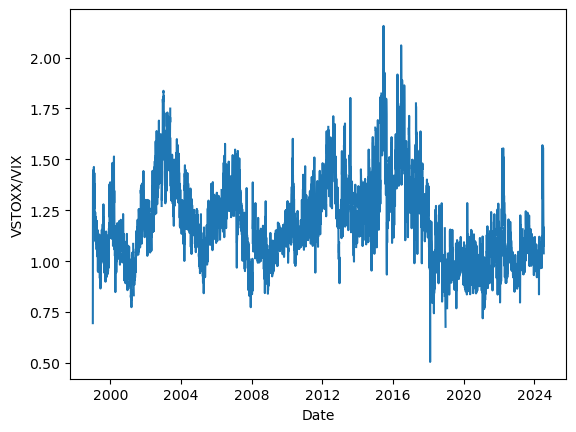

In [16]:
df.loc[:, "spread"] = df["VSTOXX"]/df["VIX"]
plt.plot(df.index, df["spread"])
plt.xlabel("Date")
plt.ylabel("VSTOXX/VIX")

In [83]:
import calendar
from datetime import timedelta

spread = df.loc[:, "spread"]
fastma = vbt.MA.run(spread, [14,21,28,50], short_name="fast")
slowma = vbt.MA.run(spread, [28,35,50,100], short_name="slow")

def first_or_last(prev_date, date, next_date, flag):
    if flag == "first":
        return prev_date.month != date.month
    else:
        return next_date.month != date.month
    
prev_dates = df.index[:-2]
dates = df.index[1:-1]
next_dates = df.index[2:]

entries = list(map(first_or_last, prev_dates, dates, next_dates, ["first"] * 6587))
exits = list(map(first_or_last, prev_dates, dates, next_dates, ["last"] * 6587))


monthlypf = vbt.Portfolio.from_signals(spread[1:-1], entries, exits)
monthlypf.stats()

d:\Users\semic\Anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

d:\Users\semic\Anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

d:\Users\semic\Anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

d:\Users\semic\Anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         1999-01-05 00:00:00
End                           2024-07-10 00:00:00
Period                                       6587
Start Value                                 100.0
End Value                                6.572022
Total Return [%]                       -93.427978
Benchmark Return [%]                   -11.087165
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                        95.913324
Max Drawdown Duration                      6565.0
Total Trades                                  249
Total Closed Trades                           248
Total Open Trades                               1
Open Trade PnL                          -1.348577
Win Rate [%]                            44.354839
Best Trade [%]                            37.1501
Worst Trade [%]                        -36.542221
Avg Winning Trade [%]                    9.835962
Avg Losing Trade [%]                    -8.475791
